In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [3]:
car=pd.read_csv('C:/Users/Ajay kumar/Downloads/quikr_car.csv')

In [4]:
car.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
car.shape

(892, 6)

In [6]:
car.info


<bound method DataFrame.info of                                        name    company  year          Price  \
0      Hyundai Santro Xing XO eRLX Euro III    Hyundai  2007         80,000   
1                   Mahindra Jeep CL550 MDI   Mahindra  2006       4,25,000   
2                Maruti Suzuki Alto 800 Vxi     Maruti  2018  Ask For Price   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT    Hyundai  2014       3,25,000   
4          Ford EcoSport Titanium 1.5L TDCi       Ford  2014       5,75,000   
..                                      ...        ...   ...            ...   
887                                      Ta       Tara  zest       3,10,000   
888                     Tata Zest XM Diesel       Tata  2018       2,60,000   
889                      Mahindra Quanto C8   Mahindra  2013       3,90,000   
890                Honda Amaze 1.2 E i VTEC      Honda  2014       1,80,000   
891               Chevrolet Sail 1.2 LT ABS  Chevrolet  2014       1,60,000   

     kms_driven fue

In [7]:
backup=car.copy()

In [8]:
car=car[car["year"].str.isnumeric()]

In [9]:
car['year']=car['year'].astype(int)

C:\Users\Ajay kumar\AppData\Local\Temp\ipykernel_16976\152728128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [11]:
car=car[car['Price']!='Ask For Price']

In [12]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [13]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [14]:
car=car[car['kms_driven'].str.isnumeric()]

In [15]:
car['kms_driven']=car['kms_driven'].astype(int)

In [16]:
car=car[~car['fuel_type'].isna()]

In [17]:
car.shape

(816, 6)

In [18]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [19]:
car=car.reset_index(drop=True)

In [20]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [21]:
car.to_csv('Cleaned_Car_data.csv')

In [23]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [24]:
car=car[car['Price']<6000000]

In [28]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [29]:
import seaborn as sn

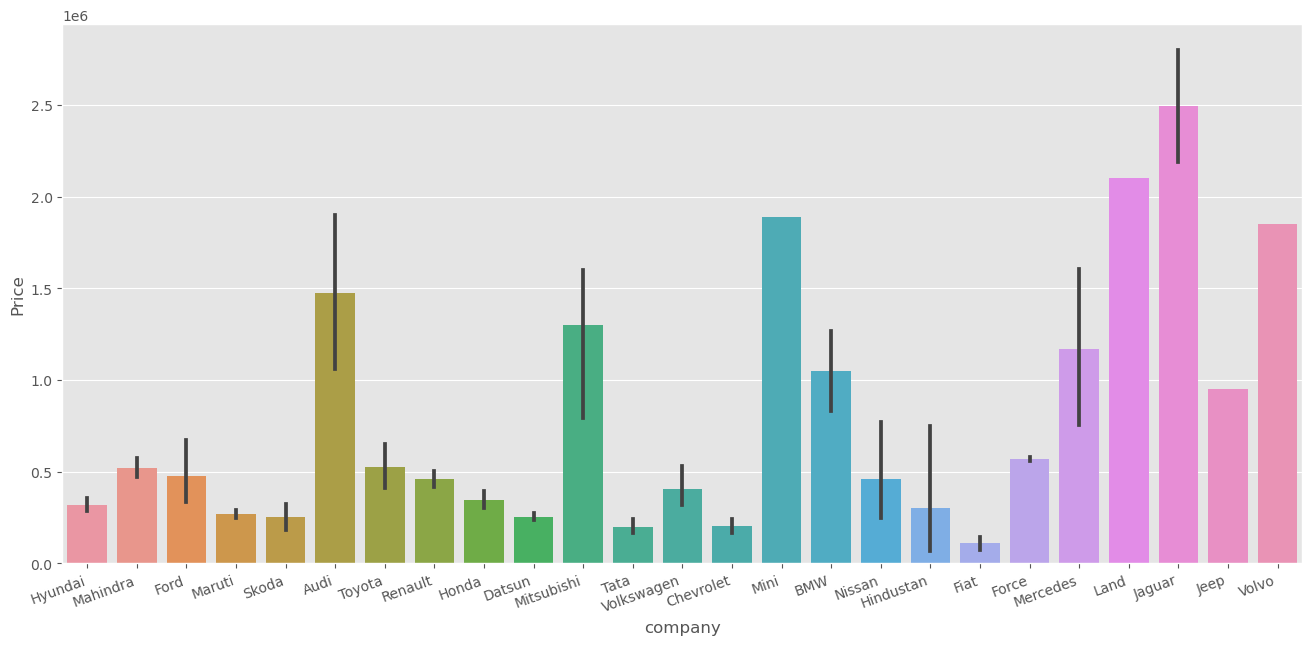

In [39]:
plt.subplots(figsize=(16,7))
ax=sn.barplot(x="company",y="Price",data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha="right")
plt.show()

C:\Users\Ajay kumar\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ajay kumar\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ajay kumar\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ajay kumar\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ajay kumar\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarn

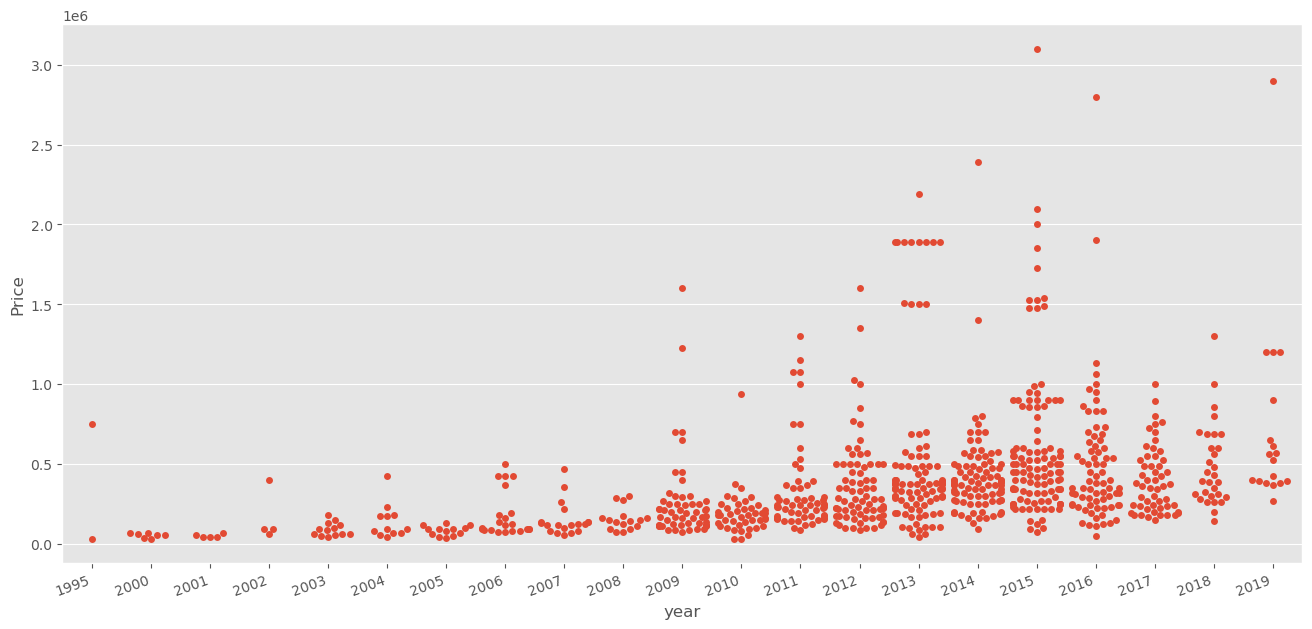

In [41]:
plt.subplots(figsize=(16,7))
ax=sn.swarmplot(x="year",y="Price",data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha="right")
plt.show()

C:\Users\Ajay kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


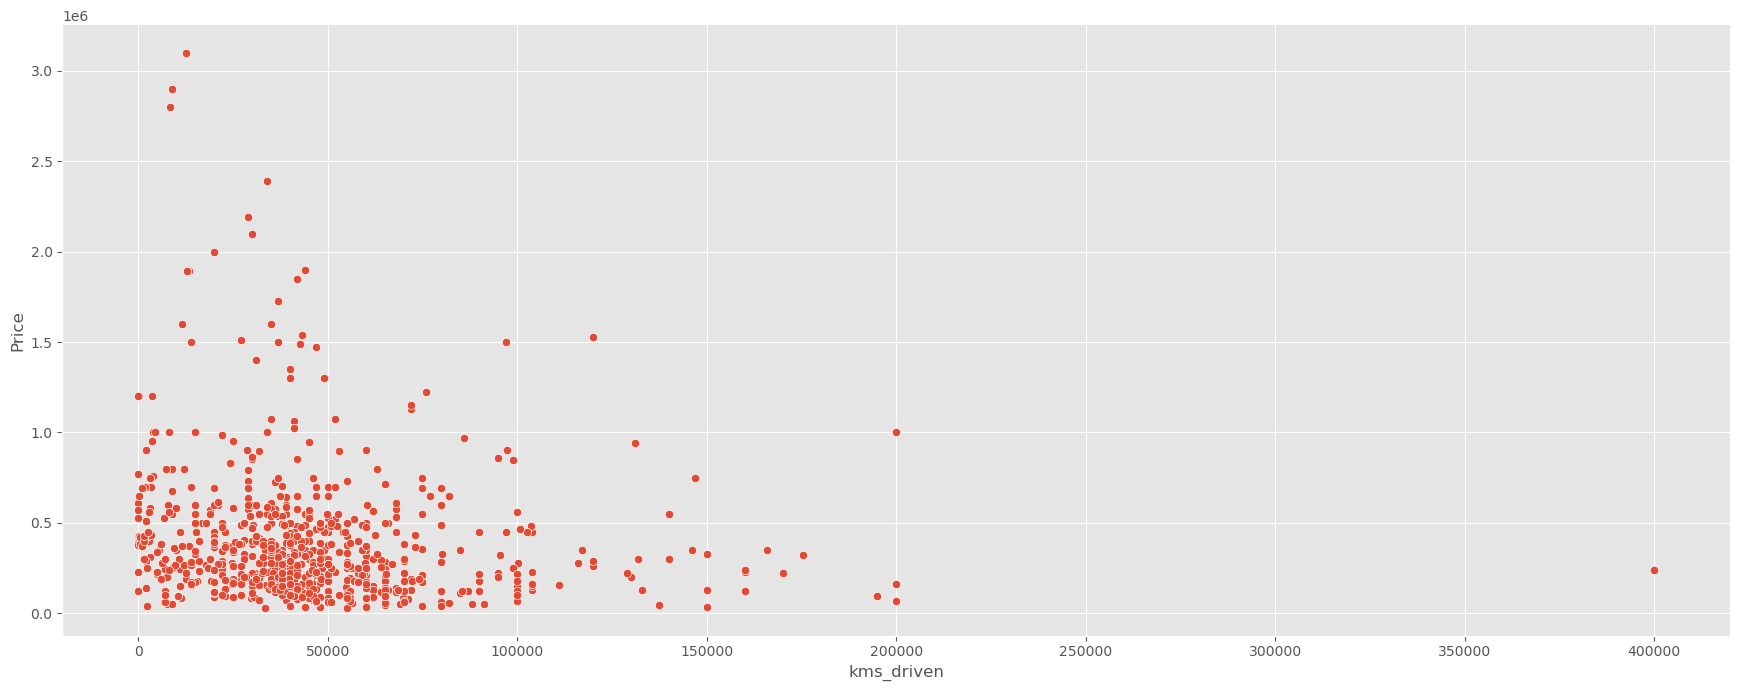

In [43]:
sn.relplot(x='kms_driven',y='Price',data=car, height=7,aspect=2.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

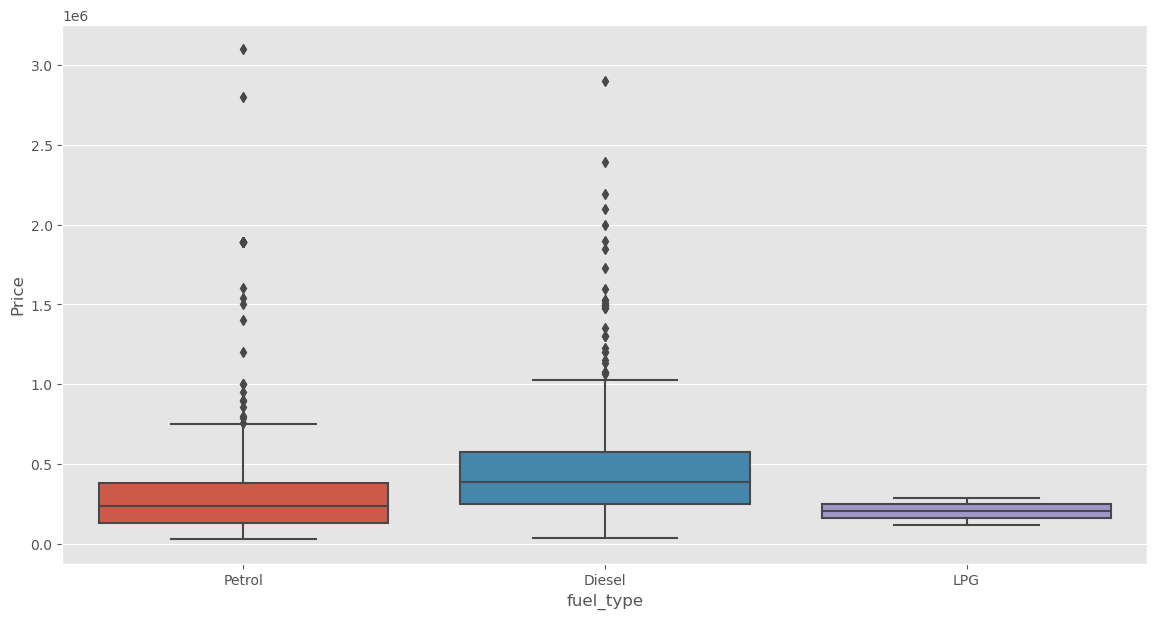

In [48]:
plt.subplots(figsize=(14,7))
sn.boxplot(x='fuel_type',y='Price',data=car)

C:\Users\Ajay kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


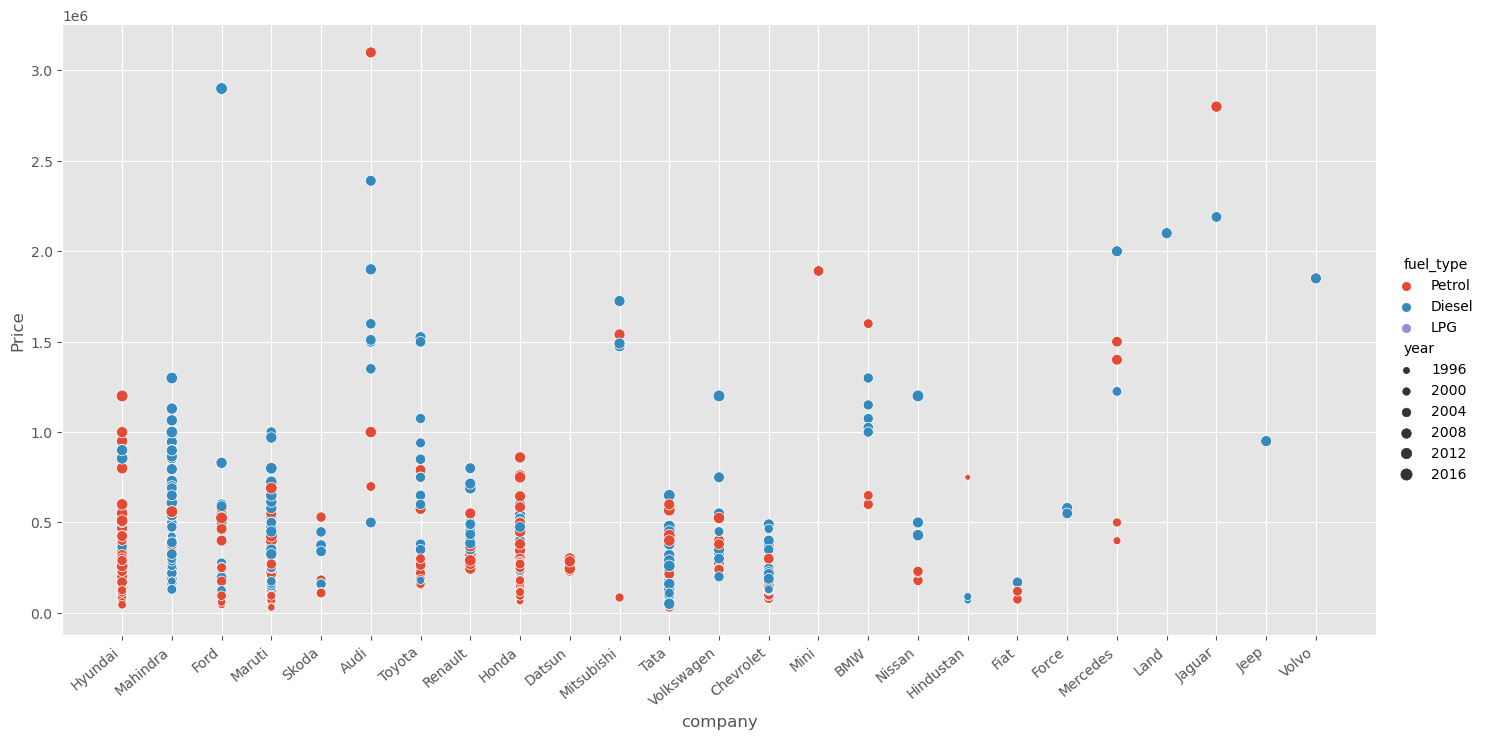

In [51]:
ax=sn.relplot(x="company",y="Price",data=car,hue="fuel_type",size="year",height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha="right")

In [52]:
x=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [62]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [63]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [64]:
lr=LinearRegression()

In [65]:
pipe=make_pipeline(column_trans,lr)

In [66]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [68]:
y_pred=pipe.predict(x_test)
print(y_pred)

[ 147446.74109837  351869.15795239  224496.54031806  473209.64461397
   56221.18525343  209593.93001059  292899.80963413  694366.79313916
  288842.82134362  230962.6148192    99650.89405417  319446.59189758
  343919.45605478  530295.97427314  464636.57237154  534514.74614865
  297840.73069951  322342.43719191  607364.63892313  262622.52818425
  572225.45924504  302377.95548992  -42173.79307852  686355.03954469
  626266.42906609  287501.73204585  458589.84013192 1067417.51511642
  445563.77550501   18967.51631114  420619.28868636   92950.09331337
  110403.69371664  156632.03454357  479043.50277067  357854.41235086
   53160.45160282  451256.25799508  759297.6656791   304508.66008177
  430682.24330144  -83886.42036288  343987.55875259  241527.80234187
  499170.17074496  484598.99319109  319411.13047218  338544.64050727
  694290.39183859  419395.28778607  543313.40627649  740048.22428453
   45673.67832105  455860.05302714  246325.82619967  348945.78194511
  419027.28335078   72643.93779949

In [69]:
r2_score(y_test,y_pred)

0.6232936275989029

In [73]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [74]:
np.argmax(scores)

302

In [75]:
scores[np.argmax(scores)]

0.8991138463319752

In [77]:
pipe.predict(pd.DataFrame(columns=x_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430287.74002343])

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8991138463319752

In [80]:
import pickle

In [81]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [82]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456740.35763086])

In [83]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese